In [1]:
from mobster_mv import mobster_MV
from plot_functions import plot_marginals, plot_deltas, plot_paretos, plot_betas
from create_beta_pareto_dataset import pareto_binomial_component, beta_binomial_component
import numpy as np
import pandas as pd
import pyro.distributions as dist
from scipy.stats import pareto, beta, uniform, norm, lognorm


import torch
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.metrics.cluster import normalized_mutual_info_score
import warnings


%load_ext autoreload
%autoreload 2

c:\Users\Standard\miniconda3\envs\mobsterh\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


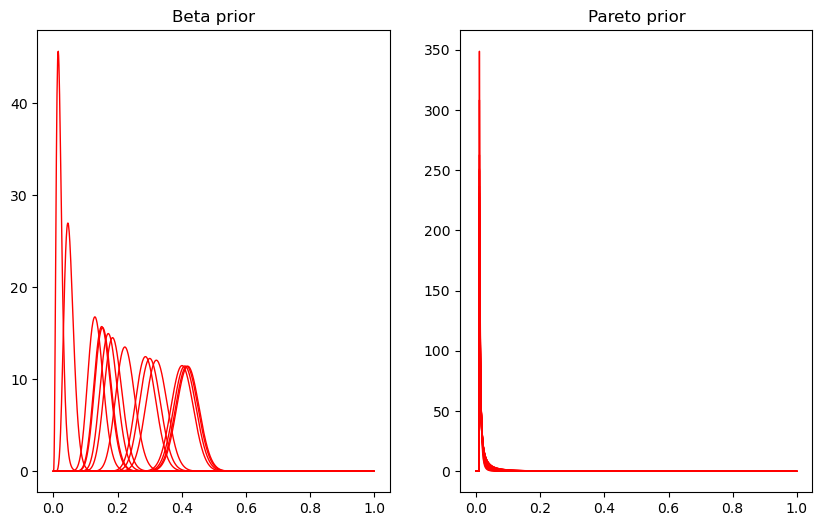

In [2]:
def plot_priors():
    # fig.tight_layout()
    fig, axes = plt.subplots(1, 2, figsize=(10, 6))
    x = np.arange(0,1,0.001)
    for _ in range(15):
        phi_beta = dist.Uniform(0., 0.5).sample().numpy()
        k_beta = dist.Normal(200, 0.5).sample().numpy()
        a_beta = phi_beta * k_beta
        b_beta = (1-phi_beta) * k_beta
        pdf = beta.pdf(x, a_beta, b_beta)
        axes[0].plot(x, pdf, 'r-', lw=1)
        axes[0].set_title("Beta prior")
    # plt.show()
    x = np.arange(0,1,0.001)
    for _ in range(25):
        # alpha = dist.LogNormal(0.7, 0.1).sample().numpy()
        alpha_mu = dist.Uniform(0.,1.).sample()
        alpha = dist.LogNormal(alpha_mu, 0.3).sample().numpy()
        # print(alpha)            
        pdf = pareto.pdf(x, alpha, scale = 0.01)
        axes[1].plot(x, pdf, 'r-', lw=1)
        axes[1].set_title("Pareto prior")
    plt.show()
plot_priors()

In [3]:
N1 = 1000
N2 = 500
seed = 123
# Sample S1
alpha_pareto = 2
L_pareto = 0.01
H_pareto = 0.3
phi_beta = 0.2
k_beta = 200
n1 = 100
NV1, DP1 = pareto_binomial_component(alpha=alpha_pareto, L=L_pareto, H=H_pareto, phi_beta = phi_beta, k_beta = k_beta, n=n1, N=N1, seed = seed)

# Sample S2
phi_beta_x = 0.5
k_beta_x = 250
phi_beta_y = 0.5
k_beta_y= 250
n2=150
NV2, DP2 = beta_binomial_component(phi_beta_x = phi_beta_x, k_beta_x = k_beta_x, phi_beta_y = phi_beta_y, k_beta_y= k_beta_y, n=n2, N=N2, seed=seed)
NV = torch.concat((NV1,NV2))
print(NV.shape)
DP = torch.concat((DP1,DP2))
print(DP.shape)

torch.Size([1500, 2])
torch.Size([1500, 2])


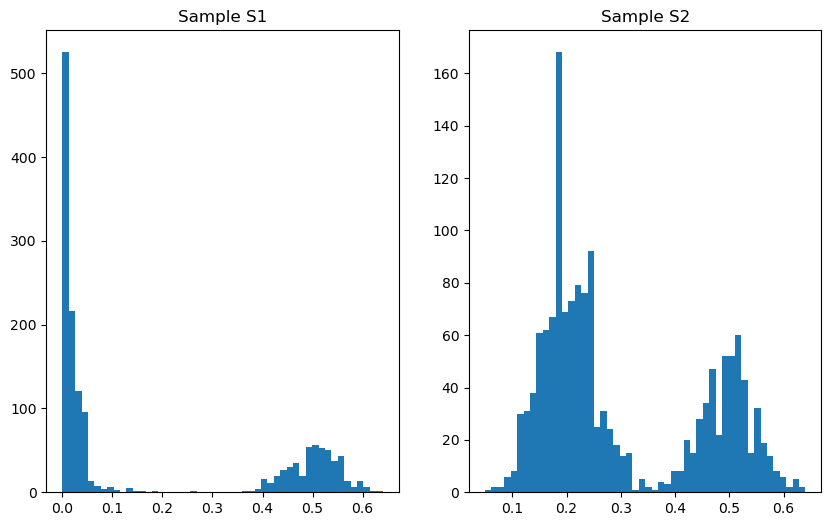

In [4]:
# x = np.linspace(0.001, 1, 1000)

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
# Sample S1
axes[0].hist(NV[:,0].numpy()/DP[:,0].numpy(), bins = 50)
axes[0].set_title("Sample S1")

axes[1].hist(NV[:,1].numpy()/DP[:,1].numpy(), bins = 50)
axes[1].set_title("Sample S2")
plt.show()

In [5]:
labels_1 = np.zeros(N1)
labels_2 = np.ones(N2)
labels = np.concatenate((labels_1, labels_2))

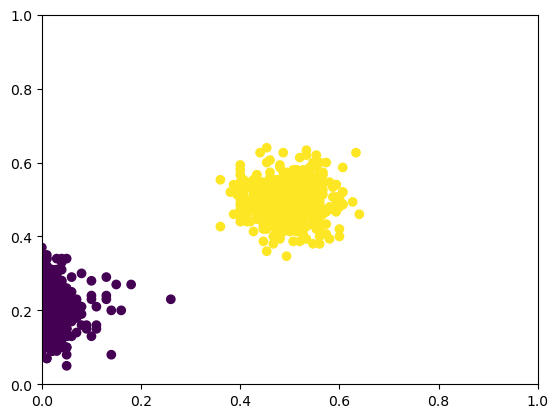

In [6]:
# Plot the dataset
plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(NV[:,0]/DP[:,0], NV[:,1]/DP[:,1], c = labels)

kmeans_centers:  tensor([[0.5020, 0.4978],
        [0.0191, 0.2010]])
Iteration 0: Loss = inf


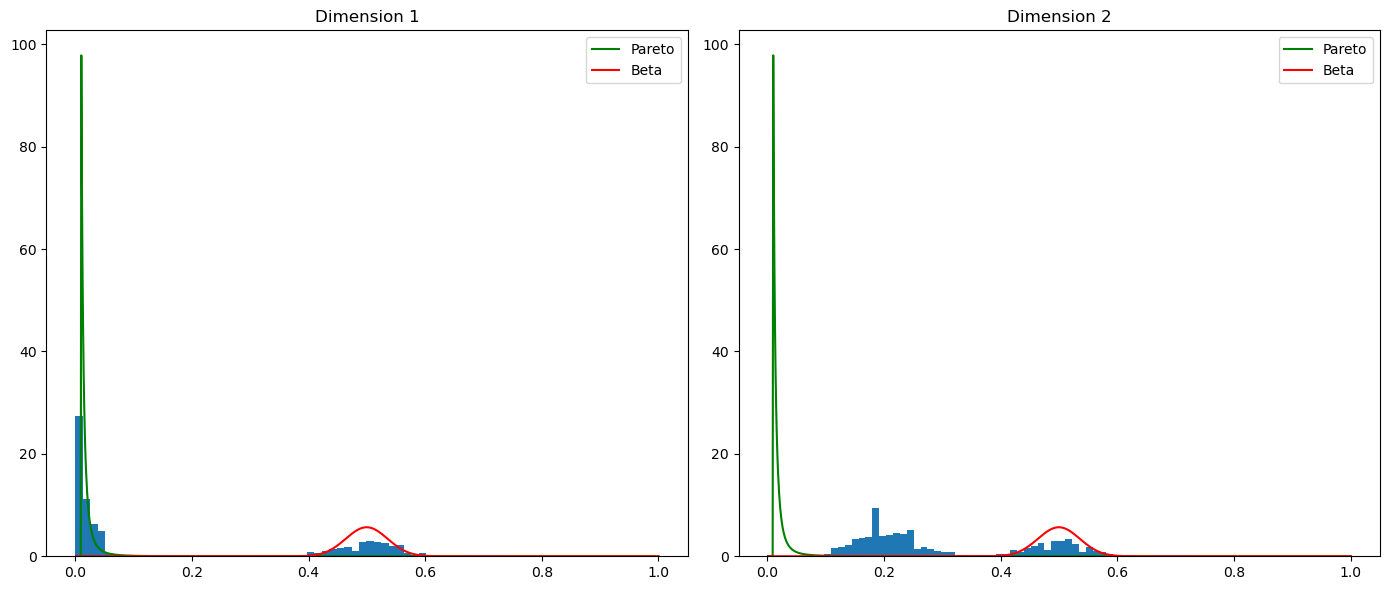

Iteration 200: Loss = -235343040.0
Iteration 400: Loss = -960209158144.0
probs_beta [[0.5734754 0.518857 ]
 [0.1641857 0.4463453]]


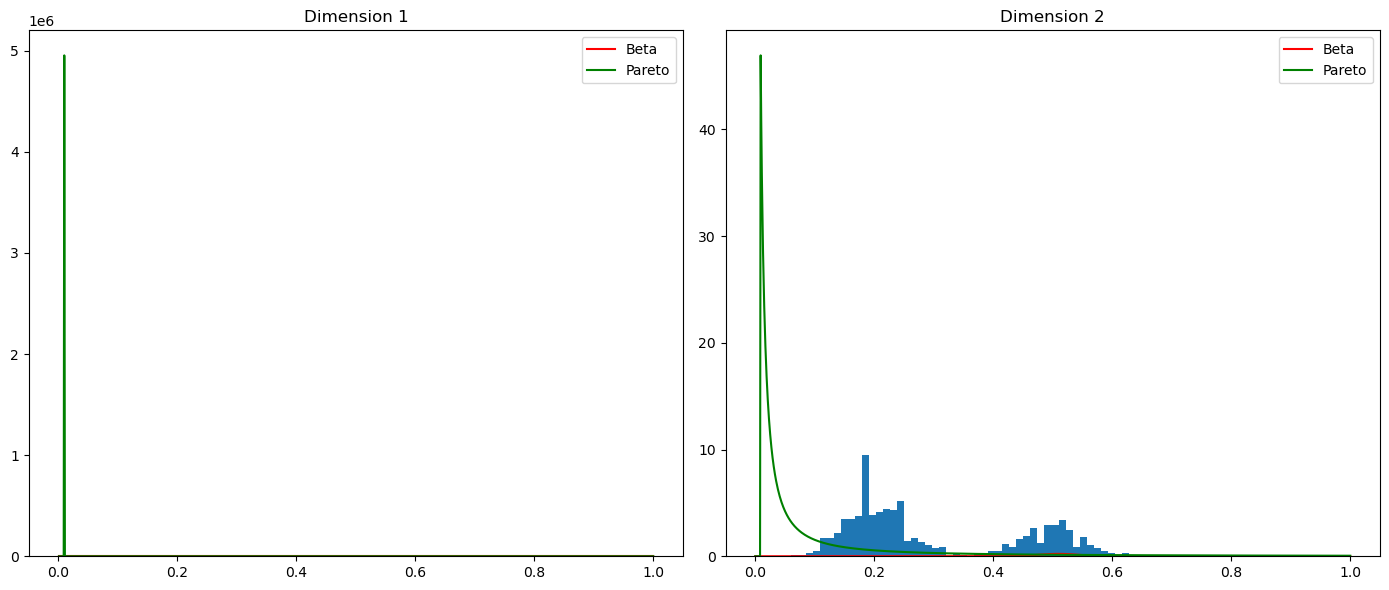

Iteration 600: Loss = -7856580200497152.0
Iteration 800: Loss = -1.9316061947094368e+20
probs_beta [[0.5732149  0.51880664]
 [0.17184412 0.48676193]]


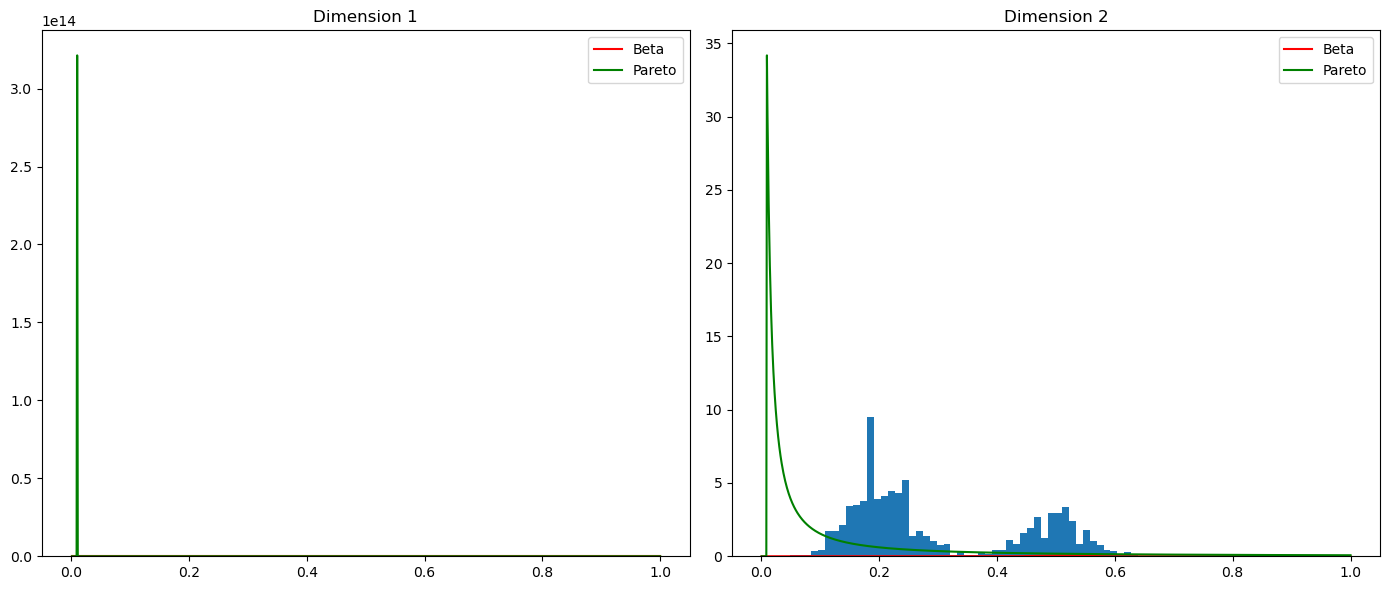

Iteration 1000: Loss = -2.3264821618810028e+20
Iteration 1200: Loss = -2.559026584171441e+20
probs_beta [[0.5728419  0.5187346 ]
 [0.16831674 0.49206072]]


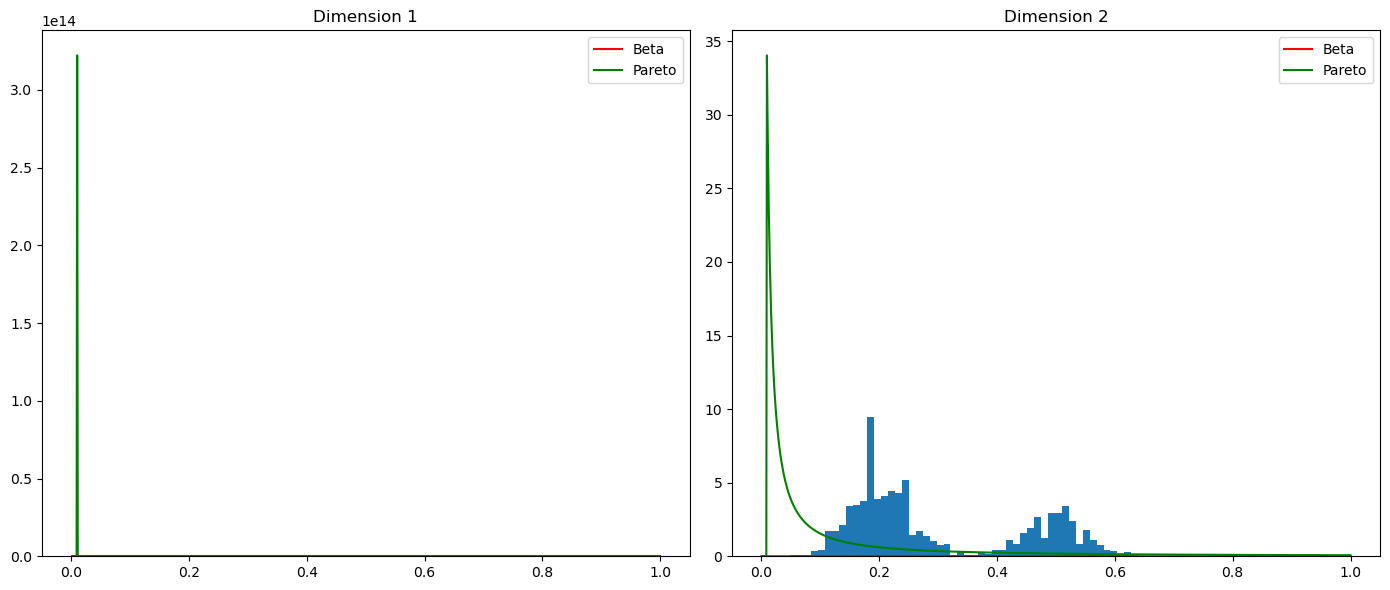

Iteration 1400: Loss = -2.7559121731154294e+20
Iteration 1600: Loss = -2.935946031125611e+20
probs_beta [[0.5723486  0.51863956]
 [0.16360687 0.49298355]]


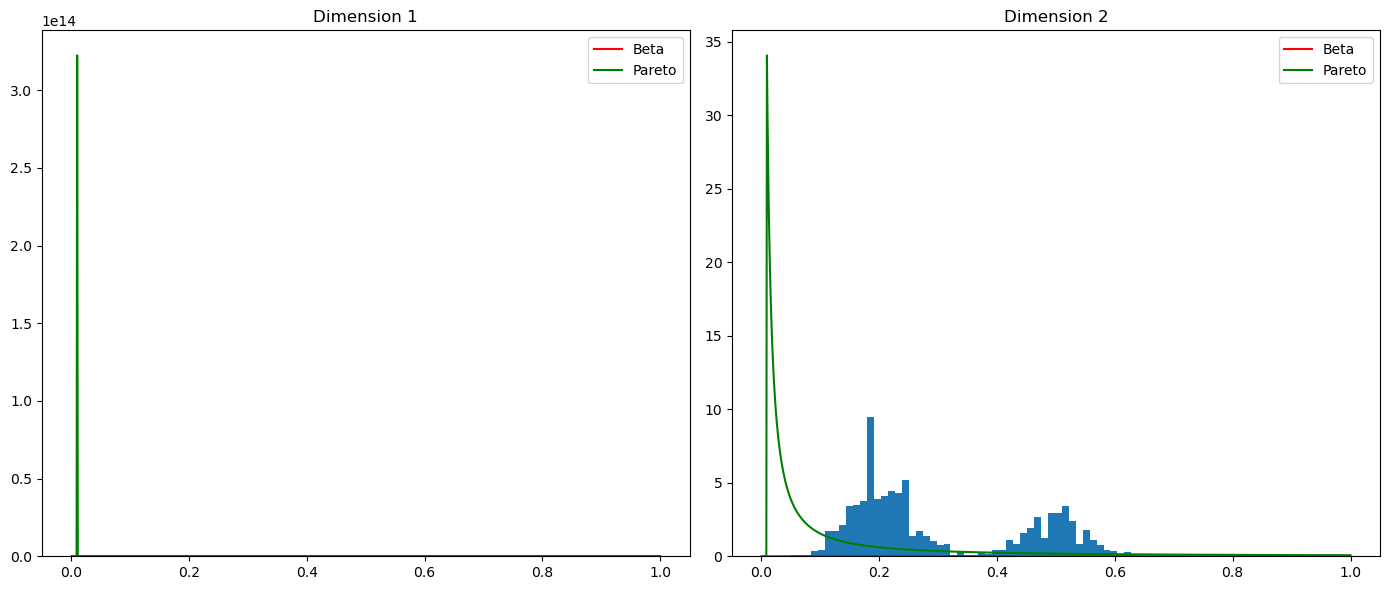

ValueError: Expected parameter probs (Tensor of shape (1500, 2)) of distribution Binomial(total_count: torch.Size([1500, 2]), probs: torch.Size([1500, 2])) to satisfy the constraint Interval(lower_bound=0.0, upper_bound=1.0), but found invalid values:
tensor([[   nan, 0.1876],
        [   nan, 0.1876],
        [   nan, 0.1876],
        ...,
        [   nan, 0.1876],
        [   nan, 0.1876],
        [   nan, 0.1876]], grad_fn=<ExpandBackward0>)
    Trace Shapes:           
     Param Sites:           
    Sample Sites:           
     weights dist        | 2
            value        | 2
  plate_dims dist        |  
            value      2 |  
 plate_probs dist        |  
            value      2 |  
       delta dist 2    2 | 2
            value 2    2 | 2
    phi_beta dist 2    2 |  
            value 2    2 |  
      k_beta dist 2    2 |  
            value 2    2 |  
  probs_beta dist 2    2 |  
            value 2    2 |  
    alpha_mu dist 2    2 |  
            value 2    2 |  
alpha_pareto dist 2    2 |  
            value 2    2 |  
probs_pareto dist 2    2 |  
            value 2    2 |  
  plate_data dist        |  
            value   1500 |  

In [7]:
mb = mobster_MV(NV, DP, K = 2, seed = 56)
mb.fit(num_iter = 3000, lr = 0.01)

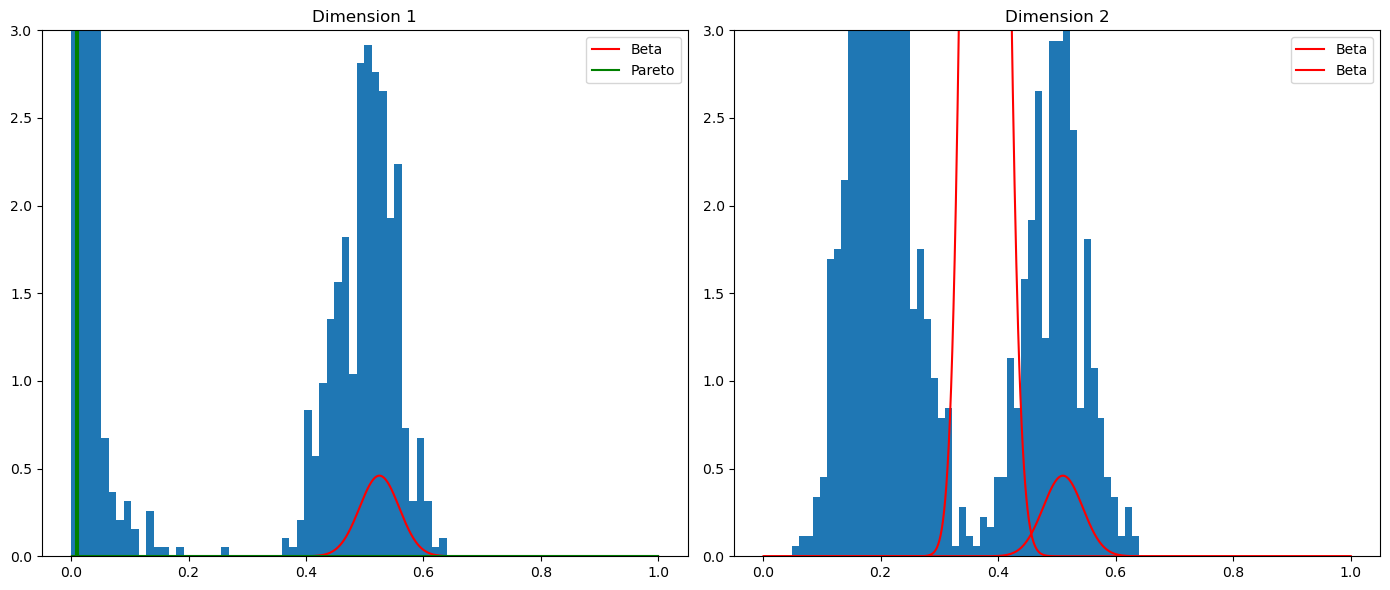

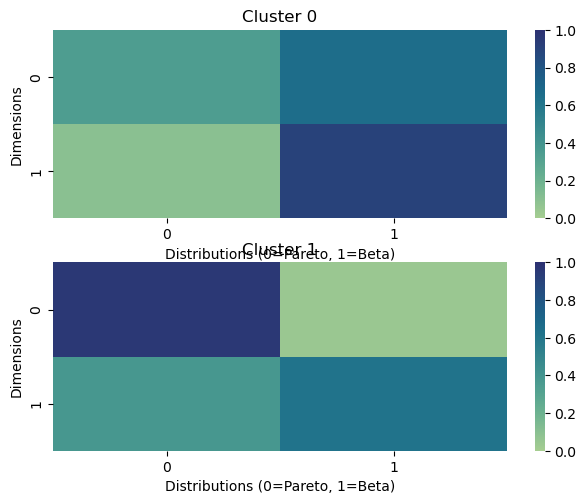

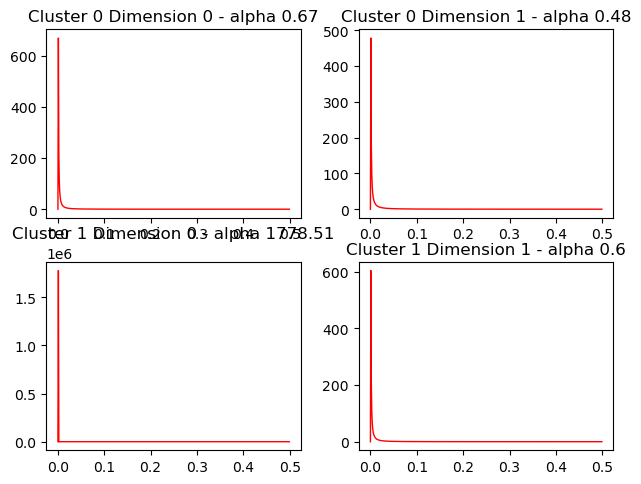

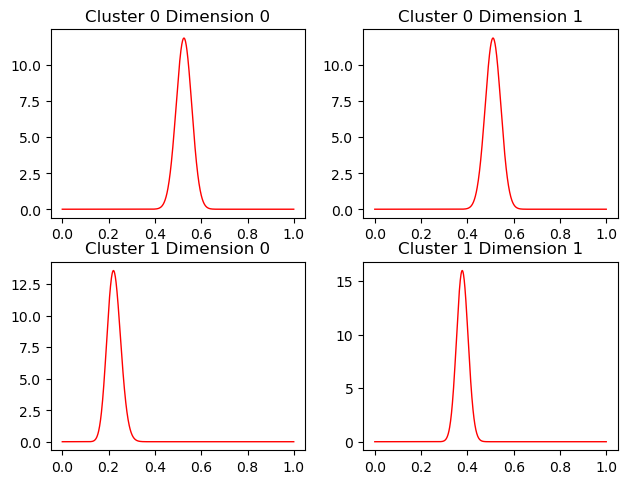

In [ ]:
plot_marginals(mb)
plot_deltas(mb)
plot_paretos(mb)
plot_betas(mb)

In [ ]:
mb.params

{'probs_beta': tensor([[0.5020, 0.4978],
         [0.1055, 0.1988]]),
 'probs_pareto': tensor([[0.0998, 0.1860],
         [0.0011, 0.0976]]),
 'weights': tensor([0.3334, 0.6666]),
 'delta': tensor([[[0.1823, 0.8177],
          [0.0582, 0.9418]],
 
         [[0.9385, 0.0615],
          [0.0783, 0.9217]]]),
 'alpha_pareto': tensor([[0.5232, 0.3947],
         [2.9364, 1.3139]]),
 'phi_beta': tensor([[0.5020, 0.4978],
         [0.1137, 0.1995]]),
 'k_beta': tensor([[422.2708, 422.2812],
         [229.1024, 440.3499]]),
 'responsib': tensor([[1.0383e-37, 2.6432e-35, 3.7873e-31,  ..., 1.0000e+00, 1.0000e+00,
          1.0000e+00],
         [1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00]]),
 'cluster_assignments': tensor([1, 1, 1,  ..., 0, 0, 0])}

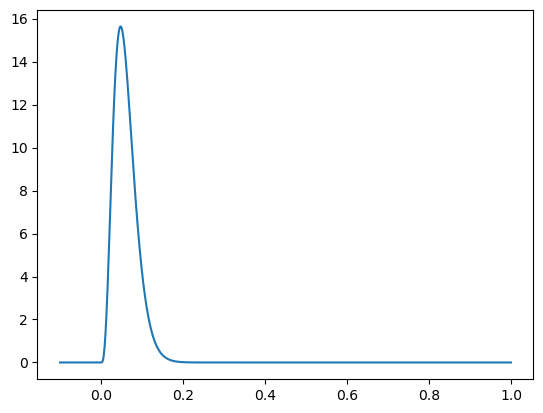

In [ ]:
x = np.arange(-0.1,1,0.001)
phi = 0.06
k = 73.2
a = phi*k
b = (1-phi)*k
pdf = beta.pdf(x, a, b)
plt.plot(x, pdf)

In [13]:
nmi = normalized_mutual_info_score(labels, mb.params['cluster_assignments']) # normalized_mutual_info_score(labels_true, labels_pred)
print(nmi) # 0 (no mutual information) and 1 (perfect correlation)

0.9856225843719508


### Using 3 components

In [41]:
N1 = 2000
N2 = 1000
N3 = 2000

NV1, DP1 = pareto_binomial_component(alpha=2, L=0.001, H=0.5, phi_beta = 0.5, k_beta = 200, n=100, N=N1, seed = seed)
NV2, DP2 = beta_binomial_component(phi_beta_x = 0.5, k_beta_x = 250, phi_beta_y = 0.5, k_beta_y= 250, n=150, N=N2, seed=seed)
NV3, DP3 = beta_binomial_component(phi_beta_x = 0.3, k_beta_x = 250, phi_beta_y = 0.3, k_beta_y= 250, n=150, N=N3, seed=seed)

NV = torch.concat((NV1,NV2))
NV = torch.concat((NV,NV3))
print(NV.shape)
# print(NV)
DP = torch.concat((DP1,DP2))
DP = torch.concat((DP,DP3))
print(DP.shape)
# print(DP)

torch.Size([5000, 2])
torch.Size([5000, 2])


In [42]:
labels_1 = np.zeros(N1)
labels_2 = np.ones(N2)
labels_3 = np.ones(N3) * 3

labels = np.concatenate((labels_1, labels_2))
labels = np.concatenate((labels, labels_3))

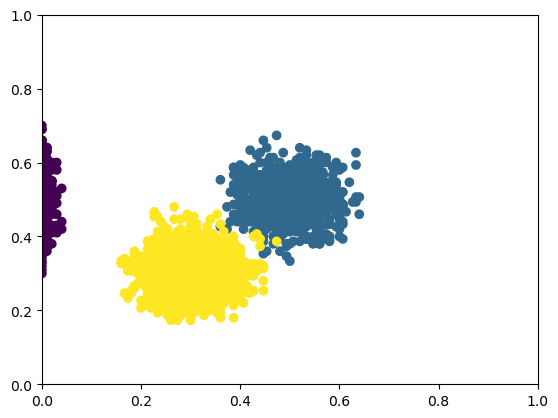

In [43]:
plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(NV[:,0]/DP[:,0], NV[:,1]/DP[:,1], c = labels)

kmeans_centers:  tensor([[0.0019, 0.5524],
        [0.3666, 0.3677],
        [0.0027, 0.4554]])
Iteration 0: Loss = inf
Iteration 200: Loss = inf
Iteration 400: Loss = 81652408.0
Iteration 600: Loss = -547905.8125
Iteration 800: Loss = -95750472.0
Iteration 1000: Loss = -229840656.0
Iteration 1200: Loss = -437258144.0
Iteration 1400: Loss = -775302528.0
Iteration 1600: Loss = -1343129600.0
Iteration 1800: Loss = -2357022720.0
Iteration 2000: Loss = -5955082752.0
Iteration 2200: Loss = -16768247808.0
Iteration 2400: Loss = -37012643840.0
Iteration 2600: Loss = -71442989056.0
Iteration 2800: Loss = -130518564864.0
Iteration 3000: Loss = -231991902208.0
Iteration 3200: Loss = -406134259712.0
Iteration 3400: Loss = -704511213568.0
Iteration 3600: Loss = -1214801772544.0
Iteration 3800: Loss = -2085794742272.0
Iteration 4000: Loss = -3569532010496.0
Iteration 4200: Loss = -6091849596928.0
Iteration 4400: Loss = -10371385524224.0
Iteration 4600: Loss = -17619677609984.0
Iteration 4800: Loss 

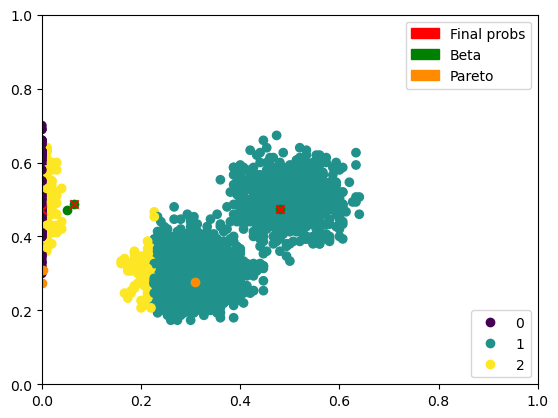

In [48]:
mb = mobster_MV(NV, DP, K = 3, seed = 12)
mb.fit(num_iter = 5000, lr = 0.001)

In [45]:
nmi = normalized_mutual_info_score(labels, mb.params['cluster_assignments']) # normalized_mutual_info_score(labels_true, labels_pred)
print(nmi) # 0 (no mutual information) and 1 (perfect correlation)

0.7014579511477547


In [46]:
mb.params

{'probs_beta': tensor([[0.0411, 0.5004],
         [0.3750, 0.3742],
         [0.0372, 0.4862]]),
 'probs_pareto': tensor([[7.5261e-06, 3.0787e-01],
         [2.1544e-01, 2.1442e-01],
         [1.4731e-03, 3.0480e-01]]),
 'weights': tensor([0.3985, 0.5663, 0.0352]),
 'delta': tensor([[[0.9789, 0.0211],
          [0.0057, 0.9943]],
 
         [[0.0647, 0.9353],
          [0.0493, 0.9507]],
 
         [[0.3417, 0.6583],
          [0.0673, 0.9327]]]),
 'alpha_pareto': tensor([[2.9741, 0.3196],
         [0.3205, 0.3416],
         [2.3646, 1.2928]]),
 'phi_beta': tensor([[0.0455, 0.5004],
         [0.3751, 0.3743],
         [0.0401, 0.4891]]),
 'k_beta': tensor([[ 200.1059, 1222.1501],
         [1264.2693, 1353.8751],
         [ 200.1493,  213.5380]]),
 'responsib': tensor([[9.9903e-01, 9.9871e-01, 9.9891e-01,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [4.2709e-25, 5.6334e-24, 1.1985e-24,  ..., 1.0000e+00, 1.0000e+00,
          1.0000e+00],
         [9.7177e-04, 1.2916e-03

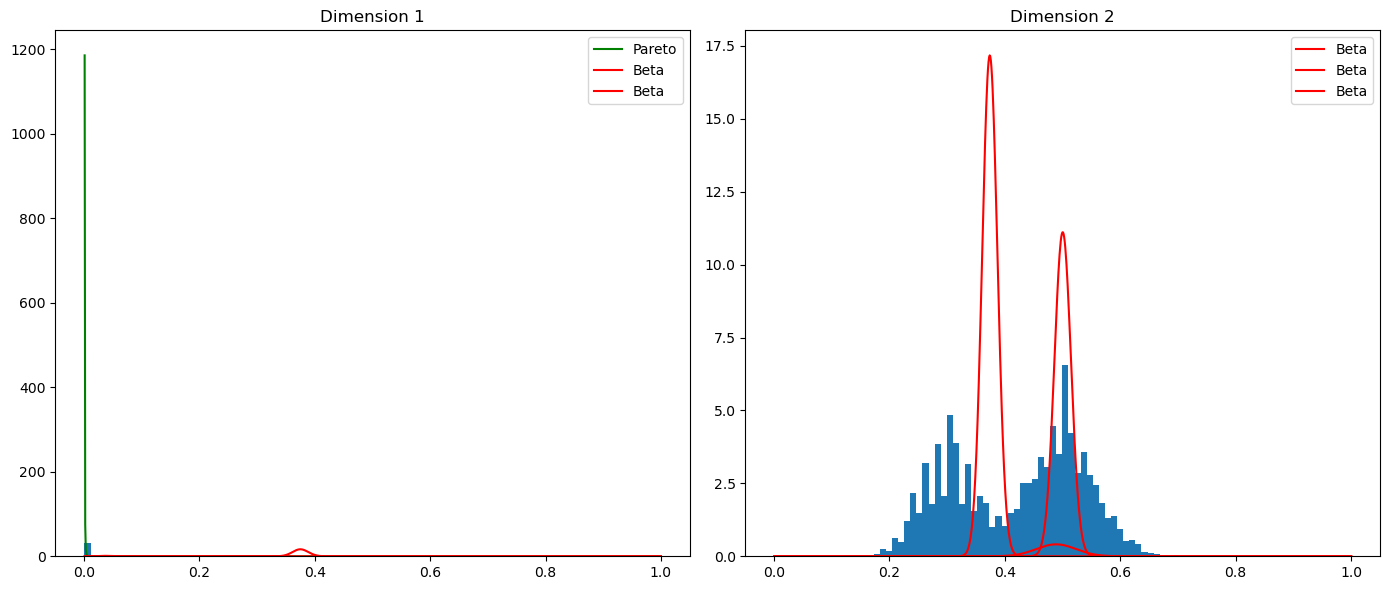

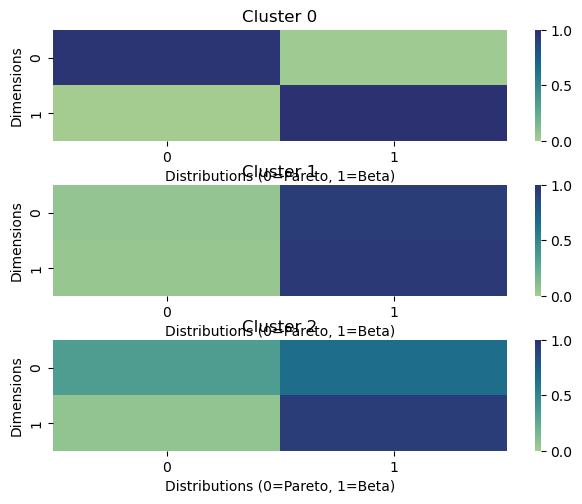

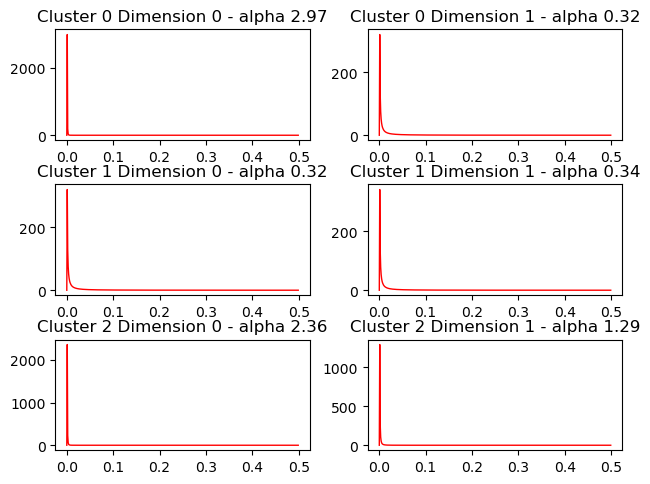

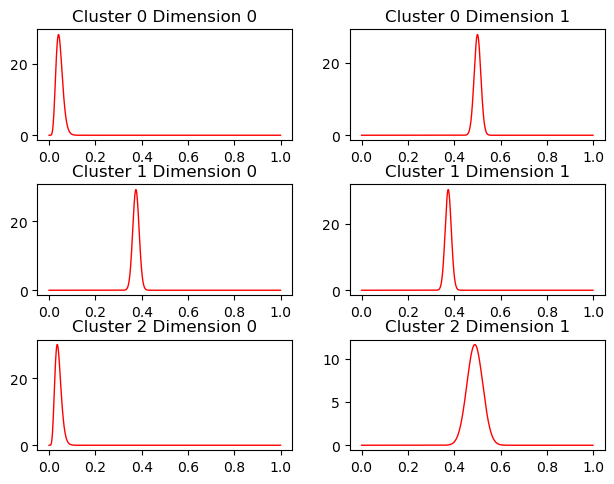

In [47]:
plot_marginals(mb)
plot_deltas(mb)
plot_paretos(mb)
plot_betas(mb)

### Using 4 components (1 beta private)

In [66]:
seed = 123
N1 = 2000
N2 = 1000
N3 = 2000
N4 = 1000

NV1, DP1 = pareto_binomial_component(alpha=2, L=0.01, H=0.5, phi_beta = 0.5, k_beta = 200, n=100, N=N1, seed = seed)
NV2, DP2 = beta_binomial_component(phi_beta_x = 0.5, k_beta_x = 250, phi_beta_y = 0.5, k_beta_y= 250, n=150, N=N2, seed=seed)
NV3, DP3 = beta_binomial_component(phi_beta_x = 0.3, k_beta_x = 250, phi_beta_y = 0.3, k_beta_y= 250, n=150, N=N3, seed=seed)
NV4, DP4 = beta_binomial_component(phi_beta_x = 0.3, k_beta_x = 250, phi_beta_y = 0.00001, k_beta_y= 250, n=150, N=N4, seed=seed)

NV = torch.concat((NV1,NV2))
NV = torch.concat((NV,NV3))
NV = torch.concat((NV,NV4))
print(NV.shape)
# print(NV)
DP = torch.concat((DP1,DP2))
DP = torch.concat((DP,DP3))
DP = torch.concat((DP,DP4))
print(DP.shape)
# print(DP) 

torch.Size([6000, 2])
torch.Size([6000, 2])


In [67]:
labels_1 = np.zeros(N1)
labels_2 = np.ones(N2)
labels_3 = np.ones(N3) * 3
labels_4 = np.ones(N4) * 4

labels = np.concatenate((labels_1, labels_2))
labels = np.concatenate((labels, labels_3))
labels = np.concatenate((labels, labels_4))

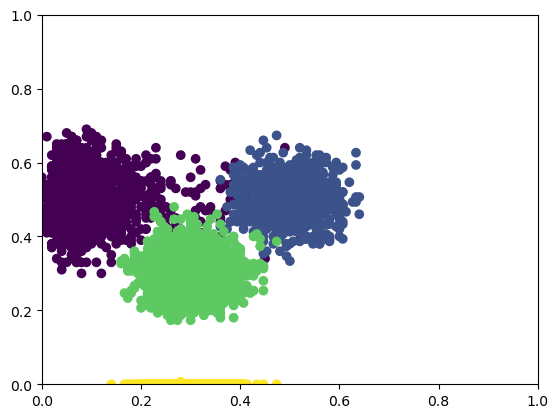

In [68]:
plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(NV[:,0]/DP[:,0], NV[:,1]/DP[:,1], c = labels)

kmeans_centers:  tensor([[8.5548e-02, 5.0117e-01],
        [2.9954e-01, 7.5996e-06],
        [2.9841e-01, 3.0305e-01],
        [4.9642e-01, 4.9917e-01]])
Iteration 0: Loss = inf
Iteration 200: Loss = 524057728.0
Iteration 400: Loss = 406983744.0
Iteration 600: Loss = 308865664.0
Iteration 800: Loss = 207549936.0
Iteration 1000: Loss = 87059360.0
Iteration 1200: Loss = -73350136.0
Iteration 1400: Loss = -306153984.0
Iteration 1600: Loss = -664438400.0
Iteration 1800: Loss = -1236458880.0
Iteration 2000: Loss = -2217552128.0
Iteration 2200: Loss = inf
Iteration 2400: Loss = inf
Iteration 2600: Loss = inf
Iteration 2800: Loss = inf


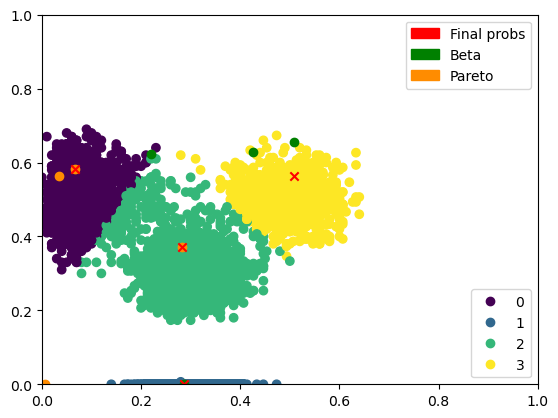

In [69]:
mb = mobster_MV(NV, DP, K = 4, seed = 12)
mb.fit(num_iter = 3000, lr = 0.001)

In [70]:
nmi = normalized_mutual_info_score(labels, mb.params['cluster_assignments']) # normalized_mutual_info_score(labels_true, labels_pred)
print(nmi) # 0 (no mutual information) and 1 (perfect correlation)

0.8879996586761119


In [73]:
mb.params

{'probs_beta': tensor([[2.2072e-01, 6.2431e-01],
         [2.8650e-01, 6.3406e-05],
         [4.2664e-01, 6.2916e-01],
         [5.0756e-01, 6.5595e-01]]),
 'probs_pareto': tensor([[6.7388e-02, 5.8189e-01],
         [6.4332e-03, 2.2140e-08],
         [2.8197e-01, 3.7198e-01],
         [3.3971e-02, 5.6247e-01]]),
 'weights': tensor([0.0664, 0.7626, 0.1114, 0.0596]),
 'delta': tensor([[[0.5407, 0.4593],
          [0.8528, 0.1472]],
 
         [[0.4498, 0.5502],
          [0.9430, 0.0570]],
 
         [[0.5763, 0.4237],
          [0.6125, 0.3875]],
 
         [[0.3506, 0.6494],
          [0.9420, 0.0580]]]),
 'alpha_pareto': tensor([[5.0280e-01, 4.7285e-01],
         [5.1024e-01, 9.3182e+02],
         [4.7818e-01, 4.7736e-01],
         [1.8841e+00, 4.6820e-01]]),
 'phi_beta': tensor([[0.2227, 0.6230],
         [0.2869, 0.0972],
         [0.4272, 0.6280],
         [0.5091, 0.6544]]),
 'k_beta': tensor([[200.0005, 200.0006],
         [560.3806, 199.8454],
         [200.0001, 200.0006],
    

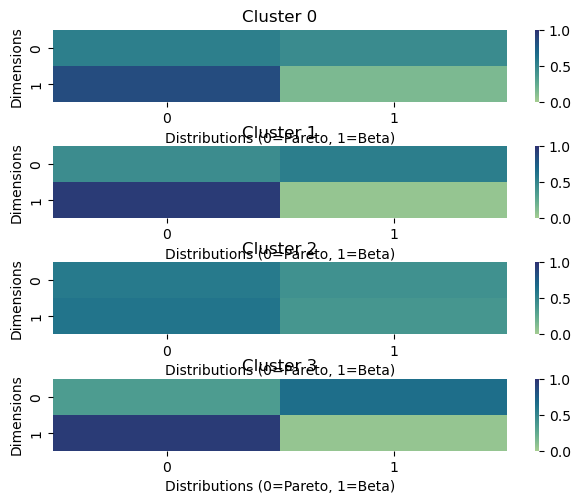

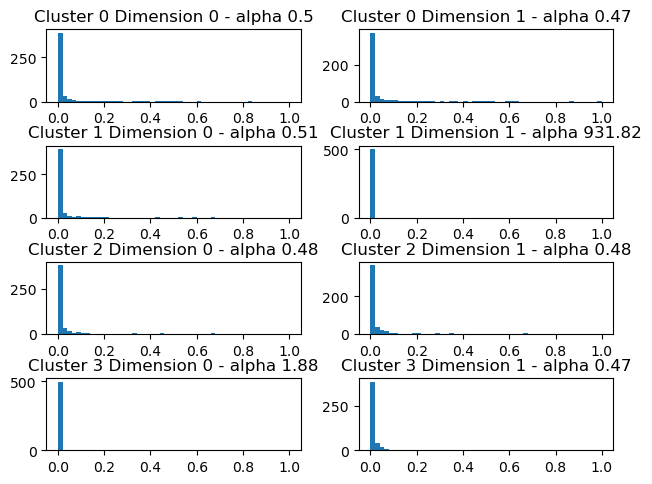

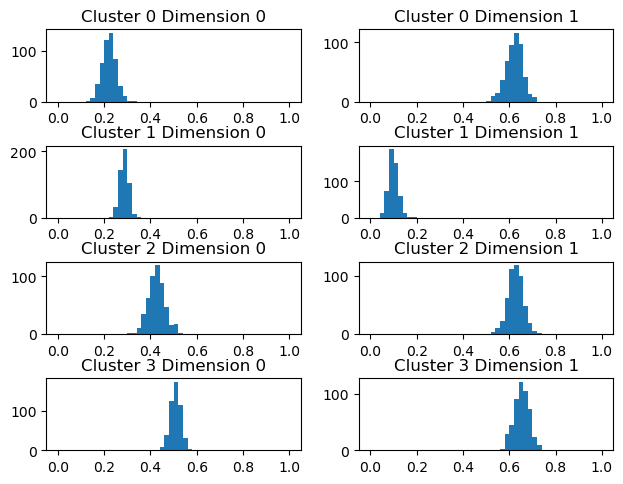

In [72]:
plot_deltas(mb)
plot_paretos(mb)
plot_betas(mb)